In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tr_data = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin')
tr_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
list(tr_data) ##### Only needed features======> OriginalTweet, Sentiment

['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

In [5]:
tr_data = tr_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)
tr_data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


### For simplification, group sentiments into 3 groups: Neutral, Positive, Negative

In [6]:
def simplify_sent(df):
    """
    Takes a dataframe including feature 'Sentiment', and returns dataframe with simplified sentiments
    
    input: dataframe
    
    output: dataframe
    """
    
    for i in range(len(df)):
        if (df['Sentiment'][i] == 'Extremely Positive') == True:
            df['Sentiment'][i] = 'Positive'
        elif (df['Sentiment'][i] == 'Extremely Negative') == True:
            df['Sentiment'][i] = 'Negative'
            
    return df

In [7]:
s_trdata = simplify_sent(tr_data)

In [8]:
s_trdata.Sentiment.unique().tolist()

['Neutral', 'Positive', 'Negative']

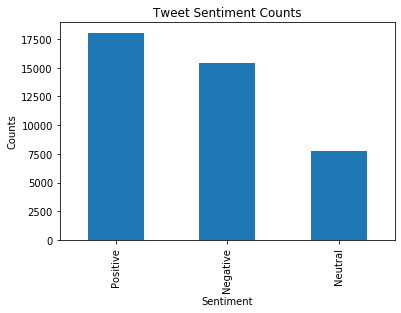

In [9]:
s_trdata.Sentiment.value_counts().plot(kind = 'bar')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Tweet Sentiment Counts')
plt.show()

In [10]:
s_trdata.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [11]:
# for balanced training, the same number of data will be used for each sentiment category
positives = s_trdata.iloc[(s_trdata['Sentiment'] == 'Positive').tolist(), :].reset_index()
negatives = s_trdata.iloc[(s_trdata['Sentiment'] == 'Negative').tolist(), :].reset_index()
neutrals = s_trdata.iloc[(s_trdata['Sentiment'] == 'Neutral').tolist(), :].reset_index()

In [12]:
import random
random.seed(0)
pos_idx = random.sample([i for i in np.arange(0, len(positives))], len(neutrals))
neg_idx = random.sample([i for i in np.arange(0, len(negatives))], len(neutrals))

In [13]:
pos_new = positives.iloc[pos_idx, :]
neg_new = negatives.iloc[neg_idx, :]

s_trdata1 = neutrals.copy()
s_trdata1 = s_trdata1.append(pos_new)
s_trdata1 = s_trdata1.append(neg_new)
len(s_trdata1)

23139

In [14]:
s_trdata1 = s_trdata1.drop('index', axis = 1).reset_index()
s_trdata1 = s_trdata1.drop('index', axis = 1)


In [15]:
s_trdata = s_trdata1.copy()

### Preprocessing the text('OriginalTweet')

In [16]:
import re
import unidecode

In [17]:
def cleaning_text(text):
    """
    takes text as input and returns cleaned text --- which is to be used for sentiment analysis
    
    input: string
    output: cleaned string
        
        0. encodes text into unicode
        1. removes contraction
        2. lowercasing
        3. removes hashtags
        4. removes mentions
        5. removes hyperlinks
        6. removes \t, \n, \r
        7. removes html tags 
        8. removes punctuations
    """
    
    target = text
    
    # encodes text into unicode
    
    target = unidecode.unidecode(target)
    
    # removes contraction
        ##(ref: https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert)
    
    target = re.sub(r"he's", "he is", str(target))
    target = re.sub(r"there's", "there is", str(target))
    target = re.sub(r"We're", "We are", str(target))
    target = re.sub(r"That's", "That is", str(target))
    target = re.sub(r"won't", "will not", str(target))
    target = re.sub(r"they're", "they are", str(target))
    target = re.sub(r"Can't", "Cannot", str(target))
    target = re.sub(r"wasn't", "was not", str(target))
    target = re.sub(r"aren't", "are not", str(target))
    target = re.sub(r"isn't", "is not", str(target))
    target = re.sub(r"What's", "What is", str(target))
    target = re.sub(r"haven't", "have not", str(target))
    target = re.sub(r"hasn't", "has not", str(target))
    target = re.sub(r"There's", "There is", str(target))
    target = re.sub(r"He's", "He is", str(target))
    target = re.sub(r"It's", "It is", str(target))
    target = re.sub(r"You're", "You are", str(target))
    target = re.sub(r"I'M", "I am", str(target))
    target = re.sub(r"shouldn't", "should not", str(target))
    target = re.sub(r"wouldn't", "would not", str(target))
    target = re.sub(r"i'm", "I am", str(target))
    target = re.sub(r"I'm", "I am", str(target))
    target = re.sub(r"Isn't", "is not", str(target))
    target = re.sub(r"Here's", "Here is", str(target))
    target = re.sub(r"you've", "you have", str(target))
    target = re.sub(r"we're", "we are", str(target))
    target = re.sub(r"what's", "what is", str(target))
    target = re.sub(r"couldn't", "could not", str(target))
    target = re.sub(r"we've", "we have", str(target))
    target = re.sub(r"who's", "who is", str(target))
    target = re.sub(r"y'all", "you all", str(target))
    target = re.sub(r"would've", "would have", str(target))
    target = re.sub(r"it'll", "it will", str(target))
    target = re.sub(r"we'll", "we will", str(target))
    target = re.sub(r"We've", "We have", str(target))
    target = re.sub(r"he'll", "he will", str(target))
    target = re.sub(r"Y'all", "You all", str(target))
    target = re.sub(r"Weren't", "Were not", str(target))
    target = re.sub(r"Didn't", "Did not", str(target))
    target = re.sub(r"they'll", "they will", str(target))
    target = re.sub(r"they'd", "they would", str(target))
    target = re.sub(r"DON'T", "DO NOT", str(target))
    target = re.sub(r"they've", "they have", str(target))
    target = re.sub(r"i'd", "I would", str(target))
    target = re.sub(r"should've", "should have", str(target))
    target = re.sub(r"where's", "where is", str(target))
    target = re.sub(r"we'd", "we would", str(target))
    target = re.sub(r"i'll", "I will", str(target))
    target = re.sub(r"weren't", "were not", str(target))
    target = re.sub(r"They're", "They are", str(target))
    target = re.sub(r"let's", "let us", str(target))
    target = re.sub(r"it's", "it is", str(target))
    target = re.sub(r"can't", "cannot", str(target))
    target = re.sub(r"don't", "do not", str(target))
    target = re.sub(r"you're", "you are", str(target))
    target = re.sub(r"i've", "I have", str(target))
    target = re.sub(r"that's", "that is", str(target))
    target = re.sub(r"i'll", "I will", str(target))
    target = re.sub(r"doesn't", "does not", str(target))
    target = re.sub(r"i'd", "I would", str(target))
    target = re.sub(r"didn't", "did not", str(target))
    target = re.sub(r"ain't", "am not", str(target))
    target = re.sub(r"you'll", "you will", str(target))
    target = re.sub(r"I've", "I have", str(target))
    target = re.sub(r"Don't", "do not", str(target))
    target = re.sub(r"I'll", "I will", str(target))
    target = re.sub(r"I'd", "I would", str(target))
    target = re.sub(r"Let's", "Let us", str(target))
    target = re.sub(r"you'd", "You would", str(target))
    target = re.sub(r"It's", "It is", str(target))
    target = re.sub(r"Ain't", "am not", str(target))
    target = re.sub(r"Haven't", "Have not", str(target))
    target = re.sub(r"Could've", "Could have", str(target))
    target = re.sub(r"youve", "you have", str(target))    
        
    # lowercasing
    
    target = target.lower()
    
    # removes hashtags
    
    target = re.sub(r"#\w+", " ", target)
    
    # removes mentions
    
    target = re.sub("@([a-zA-Z0-9_.-]{1,100})", " ", target)
    
    # removes hyperlinks
    
    target = re.sub(r"http\S+", " ", target)
    
    # removes \t, \n, \r
    
    target = target.replace("\t", " ")
    target = target.replace("\n", " ")
    target = target.replace("\r", " ")
    
    # removes html tags
    
    target = re.sub(r"<.*?>", " ", target)
    
    # removes punctuations
    
    target = re.sub(r'[^\w\s]', ' ', target)
    
    return target

In [18]:
trythis = s_trdata['OriginalTweet'].apply(cleaning_text)

In [19]:
cs_trdata = s_trdata.copy()
cs_trdata['OriginalTweet'] = trythis

In [104]:
from wordcloud import WordCloud

In [108]:
positives = ' '.join([word for word in cs_trdata[cs_trdata.Sentiment == 'Positive']['OriginalTweet']])
neutrals = ' '.join([word for word in cs_trdata[cs_trdata.Sentiment == 'Neutral']['OriginalTweet']])
negatives = ' '.join([word for word in cs_trdata[cs_trdata.Sentiment == 'Negative']['OriginalTweet']])

In [116]:
wc_positive = WordCloud(width = 800, height = 500, max_font_size = 100, background_color = 'white', colormap = 'Reds').generate(positives)
wc_neutral = WordCloud(width = 800, height = 500, max_font_size = 100, background_color = 'white', colormap = 'Purples').generate(neutrals)
wc_negative = WordCloud(width = 800, height = 500, max_font_size = 100, background_color = 'white', colormap = 'Blues').generate(negatives)

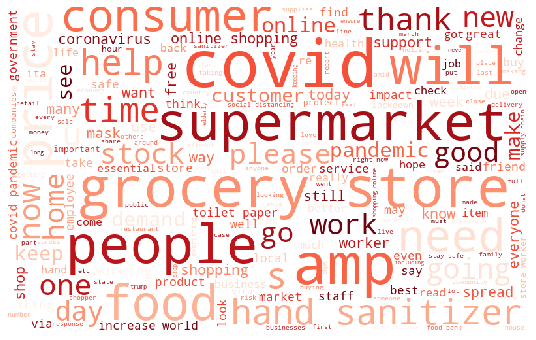

In [120]:
plt.figure(figsize = (10, 6))
plt.imshow(wc_positive)
#plt.title('Positive Tweets')
plt.axis('off')
plt.show()

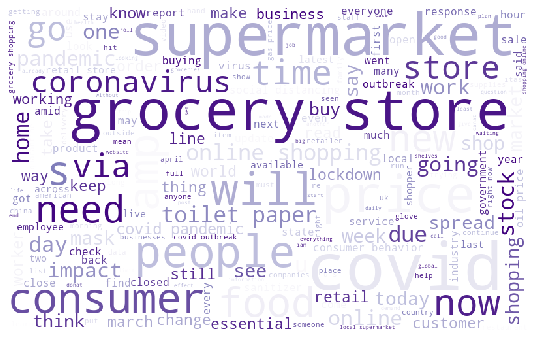

In [121]:
plt.figure(figsize = (10, 6))
plt.imshow(wc_neutral)
#plt.title('Neutral Tweets')
plt.axis('off')
plt.show()

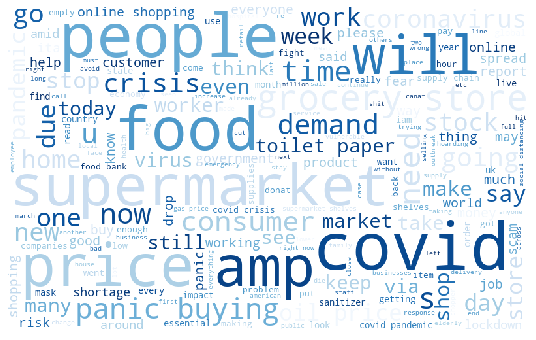

In [122]:
plt.figure(figsize = (10, 6))
plt.imshow(wc_negative)
#plt.title('Negative Tweets')
plt.axis('off')
plt.show()

## Process data to feed into a model

In [20]:
# change Sentiment values into integer type

def to_int(text):
    """
    takes sentiment string and returns integer value
    input: str
    output: int
    
    Changes ...
        Negative -> 0
        Neutral -> 1
        Positive -> 2
    """
    
    target = text
    if (target == 'Positive') == True:
        target = 2
    elif (target == 'Negative') == True:
        target = 0
    else:
        target = 1
        
    return target

In [21]:
cs_trdata['Sentiment'] = cs_trdata['Sentiment'].apply(to_int)

In [22]:
## processing test data

te_data = pd.read_csv('Corona_NLP_test.csv', encoding = 'latin')

te_data = te_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)
s_tedata = simplify_sent(te_data)
trythis1 = s_tedata['OriginalTweet'].apply(cleaning_text)

cs_tedata = s_tedata.copy()
cs_tedata['OriginalTweet'] = trythis1

cs_tedata['Sentiment'] = cs_tedata['Sentiment'].apply(to_int)

In [23]:
inputx = cs_trdata.append(cs_tedata)

## Vectorizing

In [97]:
# defining tokenizer

import spacy
nlp = spacy.load("en_core_web_sm", disable = ["tagger", "parser", "ner"])

def tokenize(text):
    """
    takes text as input and returns tokenized text
    input: text
    output: list of tokenized words
    
    1. the token must be a word
    2. the token must not be a stopword
    3. the token must be lemmatized
    """
    
    doc = nlp(text)
    processed = []
    for token in doc:
        if ((token.lemma_.isalpha() == True) and (token.is_stop == False)) == True:
            processed.append(token.lemma_)
            
    return processed

#### Tfidf Vectorizer will be used for vectorization

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(tokenizer = tokenize)
vectorizer1.fit(cs_trdata['OriginalTweet'])
Xt1 = vectorizer1.transform(cs_trdata['OriginalTweet'])

C:\Users\jylee\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [100]:
x_t = vectorizer1.transform(cs_tedata['OriginalTweet'])

In [28]:
# splitting train-validation-test set ####### not used 

from sklearn.model_selection import train_test_split

Y = cs_trdata['Sentiment']
X = Xt[:len(cs_trdata),:]

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Y_test = cs_tedata['Sentiment']
X_test = Xt[len(cs_trdata):,:]

## Support Vector Machine Classifier

In [102]:
from sklearn.svm import SVC

svc1 = SVC()
svc1.fit(Xt1, cs_trdata['Sentiment'])
pred_svc1 = svc1.predict(x_t)

In [103]:
from sklearn.metrics import classification_report

print(classification_report(pred_svc1, Y_test))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1429
           1       0.82      0.49      0.61      1038
           2       0.71      0.83      0.76      1331

    accuracy                           0.73      3798
   macro avg       0.75      0.71      0.71      3798
weighted avg       0.74      0.73      0.72      3798



## LSTM Classifier

In [28]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # to make Ys into appropriate form
from tensorflow.keras.preprocessing.text import Tokenizer # to tokenize the text
from tensorflow.keras.preprocessing.sequence import pad_sequences # to make all sequences fit a given standard length
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Softmax, Dropout # necessary layers
from tensorflow.keras.losses import categorical_crossentropy # loss measure for model compiling
from tensorflow.keras.optimizers import Adam # optimizer for model compiling

C:\Users\jylee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jylee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jylee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jylee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [58]:
Y = to_categorical(Y, 3)
Y #(23139,3)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [30]:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(cs_trdata['OriginalTweet']) # fitting tokenizer to the training data

X1 = tokenizer1.texts_to_sequences(cs_trdata['OriginalTweet'])
v_size = len(tokenizer1.word_index) + 1
X1 = pad_sequences(X1, padding = 'post')

In [83]:
x_test = tokenizer1.texts_to_sequences(cs_tedata['OriginalTweet'])
x_test = pad_sequences(x_test, padding = 'post', maxlen = 64)
y_test = to_categorical(Y_test, 3)

In [84]:
x_test.shape

(3798, 64)

In [95]:
# build models
tf.set_random_seed(1)
model1 = Sequential()
model1.add(Embedding(v_size, output_dim = 10, input_length = X1.shape[1]))
model1.add((LSTM(100, dropout = 0.2)))
model1.add(Dense(Y.shape[1], activation = 'softmax'))
model1.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 64, 10)            290490    
_________________________________________________________________
lstm_22 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 303       
Total params: 335,193
Trainable params: 335,193
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
print(X1.shape, Y.shape)

(23139, 64) (23139, 3)


In [96]:
history1 = model1.fit(X1,Y, epochs = 10, batch_size = 100, validation_split = 0.2)

Train on 18511 samples, validate on 4628 samples
Epoch 1/10
18511/18511 [==============================] - 33s 2ms/sample - loss: 0.9703 - acc: 0.5281 - val_loss: 1.6260 - val_acc: 0.0000e+00
Epoch 2/10
18511/18511 [==============================] - 34s 2ms/sample - loss: 0.7381 - acc: 0.7021 - val_loss: 1.8542 - val_acc: 0.0000e+00
Epoch 3/10
18511/18511 [==============================] - 34s 2ms/sample - loss: 0.6108 - acc: 0.7614 - val_loss: 1.7760 - val_acc: 0.0000e+00
Epoch 4/10
18511/18511 [==============================] - 34s 2ms/sample - loss: 0.5513 - acc: 0.7785 - val_loss: 1.7871 - val_acc: 0.0318
Epoch 5/10
18511/18511 [==============================] - 34s 2ms/sample - loss: 0.4957 - acc: 0.8017 - val_loss: 1.5713 - val_acc: 0.2025
Epoch 6/10
18511/18511 [==============================] - 34s 2ms/sample - loss: 0.4577 - acc: 0.8268 - val_loss: 1.8919 - val_acc: 0.3805
Epoch 7/10
18511/18511 [==============================] - 34s 2ms/sample - loss: 0.4344 - acc: 0.8429 - v

In [85]:
ypred = model.predict(x_test)

In [92]:
ypred1 = ypred.argmax(axis = -1)
ypred1.shape

(3798,)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred1))

              precision    recall  f1-score   support

           0       0.73      0.30      0.43      1633
           1       0.58      0.74      0.65       619
           2       0.59      0.89      0.71      1546

    accuracy                           0.61      3798
   macro avg       0.63      0.64      0.59      3798
weighted avg       0.65      0.61      0.58      3798



In [128]:
def plot_results(history):
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc = history.history['val_acc']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

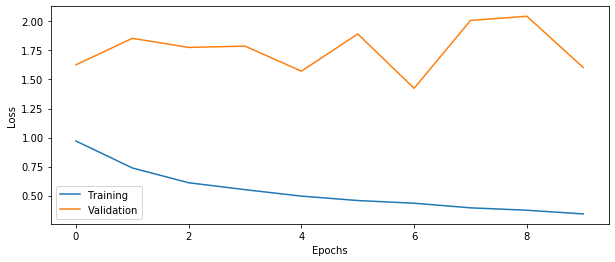

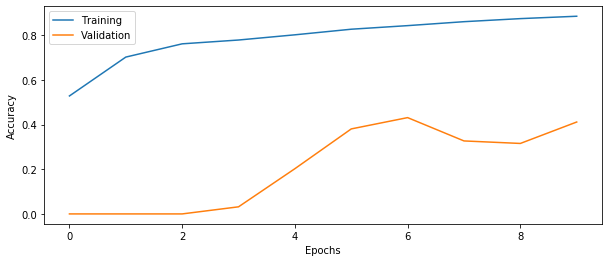

In [129]:
plot_results(history1)

In [127]:
history1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])